$\Huge{\text{Modelisation du cours du BITCOIN}}$

<hr><b>
<hr><b>

$\huge{\text{Groupe KAGLAN KHABIE}}$

# Les Imports

In [62]:
#Remarque : 
#Le module arch est appellé dans les imports. Il faudra l'installer avec la commande !pip install arch 
#Il faut avoir installé Selenium pour faire tourner ce code
#J'ai du passer pas Selenium pour solutioner le problème concernant 
#l'affichage des pages successives et la récupération des données 

In [ ]:
#Partie webscrapping 
#Pour faire tourner ce code,il faut préalablement avoir installé les drivers Chrome 

#Disponibles ici : https://chromedriver.chromium.org/downloads (je suis sur Mac pour ma part)
#L'éxécution du programme est longue, chaque requête effectuée sur le site récupère les données sur un peu 
#moins d'un mois, qui rend le tout très long

In [ ]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.collections import PolyCollection
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from arch.unitroot import ADF
import pmdarima as pmd

from bs4.element import Tag
import selenium
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import requests
import time
plt.rcParams['figure.figsize']=(10,8)
plt.rc('axes', labelsize = 15)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.style.use('seaborn-whitegrid')

# Récupération de la donnée

## Récupération par Webscraping

$ \textbf{Commentaire:}$ La récupération prend environ 10 minutes. Le fichier txt récupérée est importé depuis SSP et utilisé à partir de la section 2.2 .

In [ ]:
url_btc_usd = "https://www.boursorama.com/bourse/devises/cours/historique/9xXBTUSDSPOT?fromSymbol=BTC&toSymbol=USD&fromLabel=bitcoin&toLabel=dollar"

In [ ]:
l = [" Date "," Fermeture (USD) "," Var% "," Max "," Min "," Ouverture (USD) "]

In [ ]:
def web_driver():
    return webdriver.Chrome(executable_path = chrome_path)

In [ ]:
def data_scraper(dateee):
    global all_data
    url = 'https://www.boursorama.com/bourse/devises/cours/historique/9xXBTUSDSPOT?fromSymbol=BTC&toSymbol=USD&fromLabel=bitcoin&toLabel=dollar'
    driver.get(url)
    inpt_date = dateee#input('Enter Data in this format DAY/MON/YEAR:--- ')
    driver.find_element_by_xpath('//*[@id="historic_search_startDate"]').send_keys(inpt_date)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="historic_search_filter"]/span').click()
    time.sleep(2)

    
    # On recherche la data que l'on souhaite extraire 

    soup =  BeautifulSoup(driver.page_source)
    rows = soup.find_all('tr',{'class':'c-table__row'})
    for row in rows:
        td =row.find_all('td')
        data = []
        for t in td:
            data.append(str(t.text).replace('/n',''))
        all_data.append(data)


    try:
        driver.find_element_by_xpath(
            '//*[@id="main-content"]/div/div/div[2]/div[1]/div[1]/div[2]/div[2]/div/div/div[2]/div[1]/div/a[2]').click()
        time.sleep(2)
    except:
        print('Page suivante')

    soup = BeautifulSoup(driver.page_source)
    rows = soup.find_all('tr', {'class': 'c-table__row'})
    for row in rows:
        td = row.find_all('td')
        data = []
        for t in td:
            data.append(str(t.text).replace('\n', ''))
        all_data.append(data)

    df = pd.DataFrame(all_data)
    

    #df.to_csv('market_data.csv') si l'on voulait récupérer les données en csv (Excel)
    


if __name__ =='__main__':

    all_data = []
    driver = web_driver()
    url = 'https://www.boursorama.com/bourse/devises/cours/historique/9xXBTUSDSPOT?fromSymbol=BTC&toSymbol=USD&fromLabel=bitcoin&toLabel=dollar'
    driver.get(url)
    time.sleep(3)

    # Partie cliquage de boutons (pour cela qu'on a du passer par Selenium)
    cookie = driver.find_element_by_xpath('/html/body/div[1]/div/div/div/div/div/div[3]/button[2]/span')
    if cookie:
        try:
            cookie.click()
        except:
            pass


    for year in range(12,21):
        for month in range(1,13):
            if month<10:
                base = '01/0{}/20{}'.format(month,year)
            else:
                base = '01/{}/20{}'.format(month,year)
            data_scraper(base)
            print('Total Data',len(all_data))

## Récupération de la donnée depuis SSPCloud

Cours de Cloture du BITCOIN sur 10 ans (du 06-12-2011 au 23-12-2021 )

In [28]:
!wget https://minio.lab.sspcloud.fr/mawulikaglan/BTCUSD_10AN.txt
!ls

--2022-01-07 09:20:22--  https://minio.lab.sspcloud.fr/mawulikaglan/BTCUSD_10AN.txt
Resolving minio.lab.sspcloud.fr (minio.lab.sspcloud.fr)... 192.168.253.151, 192.168.253.152
Connecting to minio.lab.sspcloud.fr (minio.lab.sspcloud.fr)|192.168.253.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180782 (177K) [binary/octet-stream]
Saving to: ‘BTCUSD_10AN.txt.4’

BTCUSD_10AN.txt.4   100%[===================>] 176.54K  --.-KB/s    in 0.004s  

2022-01-07 09:20:23 (48.7 MB/s) - ‘BTCUSD_10AN.txt.4’ saved [180782/180782]

 BTCUSD_10AN.txt     BTCUSD.txt
 BTCUSD_10AN.txt.1  'Charles-Travail de modelisation .ipynb'
 BTCUSD_10AN.txt.2  'Notebook DataScience Project - Webscrapping.ipynb'
 BTCUSD_10AN.txt.3  'Notebook Webscrapping using Selenium - Final.ipynb'
 BTCUSD_10AN.txt.4   Untitled.ipynb


## Importation des données :

In [29]:
BTC = pd.read_csv('BTCUSD_10AN.txt', sep="\t", parse_dates=[0], index_col=0)

In [30]:
for x in BTC:
    print(x)

ouv
haut
bas
clot
vol
devise
Unnamed: 7


In [31]:
BTC_1=BTC['2017-01-01':].copy()

In [32]:
Close = BTC_1['clot']

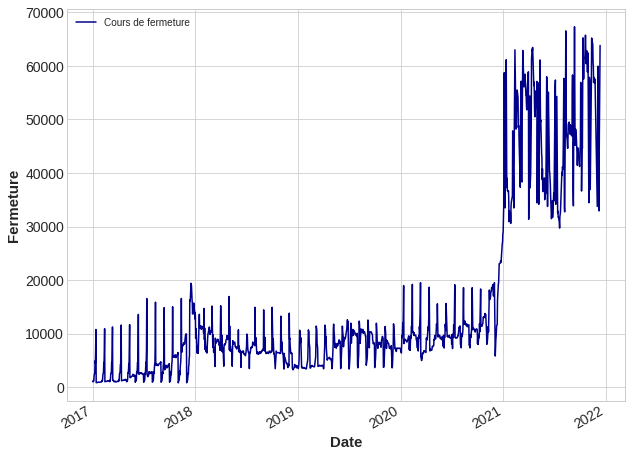

In [33]:
Close.plot(color='darkblue', label='Cours de fermeture')
plt.ylabel('Fermeture', fontdict={'weight':'bold'})
plt.xlabel('Date',fontdict={'weight':'bold'})
plt.legend()

## Serie des log-returns

In [34]:
logrets=Close.pct_change().apply(lambda x: np.log(1 + x)).dropna()

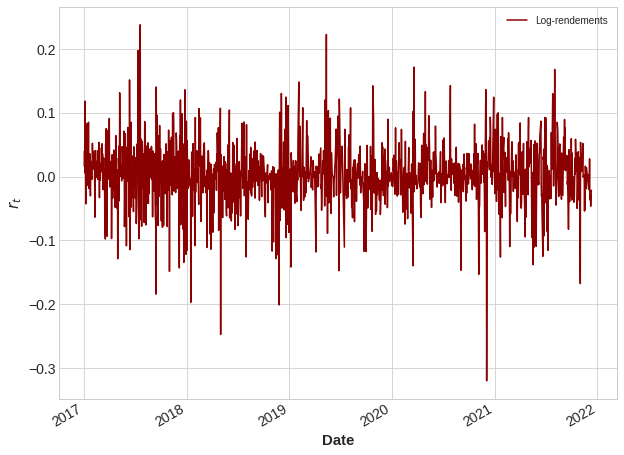

In [35]:
logrets.plot(color='darkred', label='Log-rendements')
plt.ylabel(r'$r_t$', fontdict={'weight':'bold'})
plt.xlabel('Date',fontdict={'weight':'bold'})
plt.legend()

$ \textbf{Commentaire:}$ Les cours du BITCOIN pariat très volatile sur les 5 dernières années

## Analyse des données

 ### Statistiques descriptives

#### Observation de la queue et de la tête des données de log-rendements

In [36]:
logrets.tail(), logrets.head()

(date
 2021-11-17   -0.012077
 2021-11-18   -0.051807
 2021-11-19    0.016305
 2021-11-22   -0.019078
 2021-11-23    0.014019
 Name: clot, dtype: float64,
 date
 2017-02-01    0.031602
 2017-03-01    0.017596
 2017-04-01    0.091093
 2017-05-01   -0.128773
 2017-06-01   -0.108510
 Name: clot, dtype: float64)

#### Statistiques descriptives

In [37]:
logrets.describe()

count    1395.000000
mean        0.002914
std         0.047480
min        -0.320083
25%        -0.017267
50%         0.003186
75%         0.026100
max         0.237815
Name: clot, dtype: float64

In [38]:
Sk = stats.skew
K = stats.kurtosis

In [39]:
Sk(logrets), K(logrets), K(logrets)-3

(-0.3668033851127422, 4.246664192750607, 1.2466641927506066)

$ \textbf{Commentaire:}$ 
- On a un coefficients de Skewness proche de 0 mais négative, alors on a une distribution un peu décalée à droite de la médiane, et donc une queue de distribution un peu étalée vers la gauche.
- On a un Kuroisis positif alors les séries des log-rendemenyts a des extrémités plus épaisses que la normale, impliquant des valeurs anormales plus fréquentes

### Préliminaires à la modelisation

#### Fonction de densité empirique de la série des log-returns (KDE)

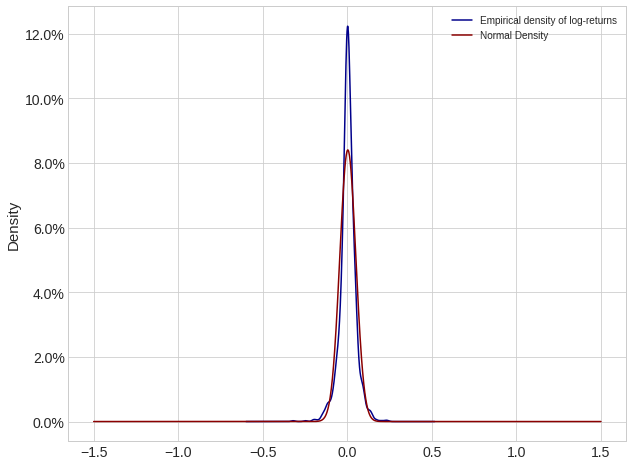

In [40]:
logrets.plot(kind='kde', color='darkblue', label='Empirical density of log-returns')
plt.yticks(plt.yticks()[0],[str(x)+'%' for x in plt.yticks()[0]])
x=np.linspace(-1.5, 1.5, len(logrets))
plt.plot(x, stats.norm.pdf(x, logrets.mean(), logrets.std()), color='darkred', label='Normal Density')
plt.legend()

$ \textbf{Commentaire:}$ 
Notre distribution semble estre proch de celle de la loi normale $\mathbb(N(0,1))$

#### Fonction de répartition empirique de la série de log returns

In [42]:
p = stats.norm.fit(logrets)

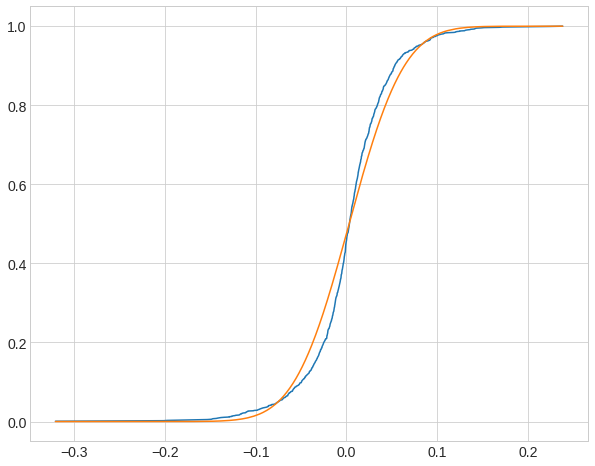

In [43]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(logrets)
x = ecdf.x
plt.plot(x, ecdf.y)
plt.plot(x, stats.norm.cdf(x, *p))

$ \textbf{Commentaire:}$ 
Fonction de répartition assez proche de celle d'une la loi normale $\mathbb(N(0,1))$

#### Diagrams QQ-plot of log-returns

(-4.0, 4.0)

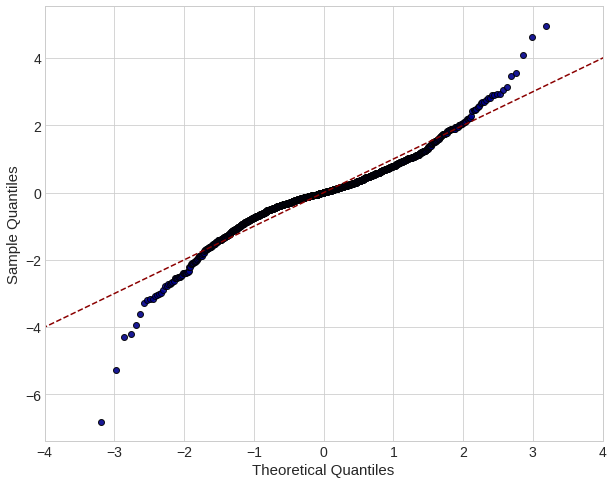

In [44]:
import statsmodels.api as sm
pp = sm.ProbPlot(logrets, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='darkblue', markeredgecolor='k', alpha=0.9)
sm.qqline(qq.axes[0], line='45', color='darkred', linestyle='dashed')
plt.xlim((-4,4))

$ \textbf{Interprétation: } $

Le diagrammme QQ-Plot donne un tracé de point très porche de la droit d'Henri. On peut soupçonné effectivement une distribution normale.

#### Loi de la série des log rendements : Etude de la Normalité

In [45]:
stats.kstest(logrets, 'norm')

KstestResult(statistic=0.4398717626222267, pvalue=2.9840982370875244e-246)

In [46]:
stats.shapiro(logrets)

ShapiroResult(statistic=0.9449649453163147, pvalue=2.1761882962886854e-22)

$\textbf{Interprétation:} $ 

Avec les tests de Shapiro et de Kolmogorov Smirnov on a une p-value<5%. On a alors H0 ne rejette donne pas H0 selon laquelle notre distribution est normale. 

#### Analyse de la stationarité : Test des Dickey-Fuller Augmenté (ADF-Augmented Dickey-Fuller Test)

##### Remarque : Il faut ici avoir d'abord installé le module arch avec la commande !pip install arch 

In [47]:
from arch.unitroot import ADF
Resultat=ADF(logrets, trend='c')
print(Resultat)

   Augmented Dickey-Fuller Results   
Test Statistic                -25.145
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


$ \textbf{Interprétation: } $

On a une p-value du Test de Dickey Fuller égale à 0.000 <5% , on alors rejet de l'hypothèse alternative selon laquelle le série des log rendements n'est pas sortionnaire. La sortie du python nous donne une stationnairité faible.

#### Fonction d'autocorrélation partiel et Fonction d'autocorrélation (ACF /PACF )

In [48]:
def AcfPacf(data, model=''):
    fig, ax = plt.subplots(2)
    smt.graphics.plot_acf(data, ax=ax[0], color='darkblue', vlines_kwargs={'linewidth':3,'color':'darkblue'});
    smt.graphics.plot_pacf(data, ax=ax[1], color='darkblue', vlines_kwargs={'linewidth':3,'color':'darkblue'});
    for item, itemm in zip(ax[0].collections, ax[1].collections):
        if ((type(item)==PolyCollection) & (type(itemm)==PolyCollection)) :
            item.set_facecolor('darkred')
            itemm.set_facecolor('darkred')
    ax[0].set_title('ACF' +model,fontdict={'weight':'bold'})
    ax[1].set_title('PACF' +model,fontdict={'weight':'bold'})
    return None

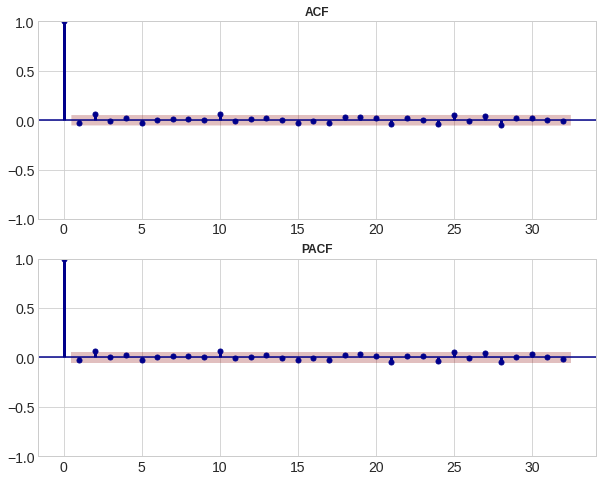

In [49]:
AcfPacf(logrets)

$ \textbf{Interprétation: } $

On remarque dans l’ACF que presque la majorité des autocorrélations, à l’exception de quelques unes comme la première, la deuxième et la cinquième sont nulles au risque d’erreur de 5%. Le même constat s’applique au PACF. 
Ce résultat est très connu dans les marchés financiers liquides et est souvent cité comme un argument ”empirique” de l’hypothèse d’efficience des marchés financiers. 

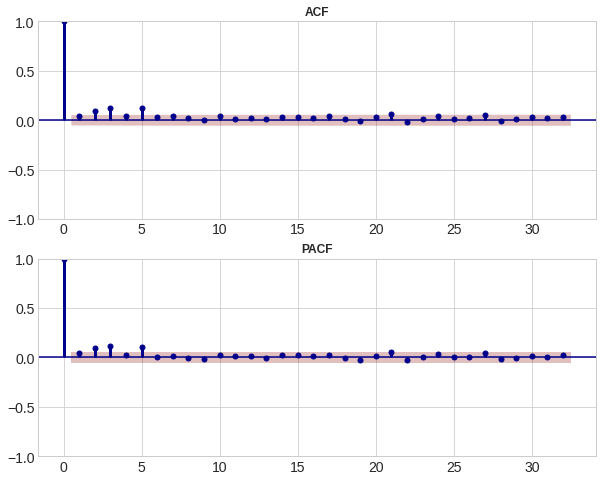

In [50]:
AcfPacf((logrets)**2)

$ \textbf{Interprétation: } $

Considérant maintenant, l’ACF et le PACF de la série des carrés des log-rendements, on remarque que les carrés des
log-rendements exhibent des autocorrélations et autaucorrélations patielles significativement non nulles, jusqu’à l’ordre 5 ! 

#### Lag-plots et intérêts à la prédiction

389  : ( -0.0247 , -0.2474  )
------------------------------
390  : ( -0.2474 , 0.1043  )
------------------------------
627  : ( 0.0103 , -0.2011  )
------------------------------
628  : ( -0.2011 , 0.0386  )
------------------------------
743  : ( 0.0490 , 0.2227  )
------------------------------
744  : ( 0.2227 , -0.0304  )
------------------------------
959  : ( -0.3201 , -0.0204  )
------------------------------
958  : ( 0.0029 , -0.3201  )
------------------------------


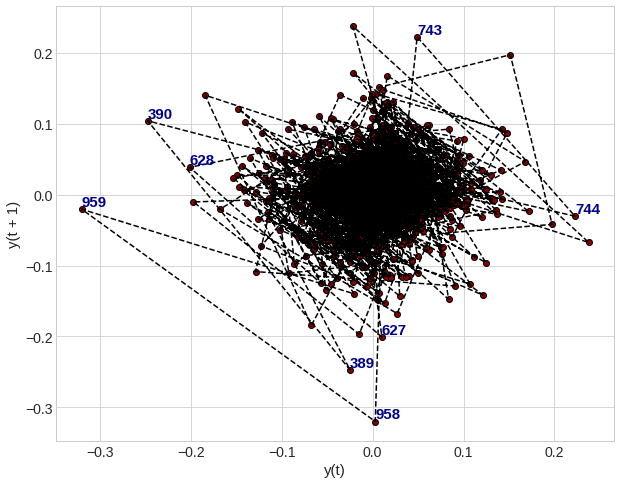

In [51]:
plt.rcParams['patch.facecolor']='darkred'
plt.plot(logrets.shift(1), logrets,'k--')
pd.plotting.lag_plot(logrets, 1, edgecolor='black')
for i in (389,390,627,628,743,744,959,958):
    plt.annotate(str(i), (logrets.shift(1)[i], logrets[i]+0.004),fontweight='bold',fontsize=15, color='darkblue')
    print(str(i),' : ( %.4f' %logrets.shift(1)[i],', %.4f ' %logrets[i],')\n------------------------------')

$ \textbf{Interprétation: } $

Considérant les variations à l'échelle logarithmique, il ,appariat qul La série des log rendements a eu à passer de 0,01 à -0,035 (Point 958) et de -0,035 à -0,02 (Point 959) et ainsi de suite. Ces variations régulières du cours du BITCOIN donnent nécessité de modelisé la volatilité du BICTOIN.

# Modelisation et Prevision (Forecasting)

## La prévision par lissage exponentiel (Exponential smoothing ):

La prévision fournie par la méthode de lissage exponentiel simple est :

$r_t= (1-\beta)\sum_{j=0}^{t-1}\beta^j r_{t-j} $

Tel que, $\beta$ est dans $]0, 1[$ une constante appelée : constante de lissage. On donne un poids d’autant moins important que les observations sont loins, avec une décroissance exponentielle

### Forcasting

In [52]:
ES = smt.ExponentialSmoothing
SES = smt.SimpleExpSmoothing


**(1-$\alpha$) Conf-int** : 

$[$ $z_{\alpha}$ : $\alpha$ quantile of the standard normal dist, $\beta$ : smoothing parameter ($\beta = 1-\gamma$ where $\gamma$ is the smoothing param in Python)$]$

- **SES** :  $ [ \ \hat{r}_t(h) - z_{1-\frac{\alpha}{2}}\ \sigma_r C(h, \beta),\  \hat{r}_t(h) + z_{1-\frac{\alpha}{2}}\ \sigma_r C(h, \beta) \  ]$ where : $$C^2(h, \beta)= 1 + \frac{1-\beta}{(1+\beta)^3} \left[(1+4\beta + 5\beta^2) + 2h(1-\beta)(1+3\beta) + 2h^2(1-\beta)^2 \right] $$

In [53]:
import warnings
warnings.filterwarnings('ignore')

class ExpSmooth:
    def __init__(self, data):
        self.data = data
        return None

    def __C(self, h, beta):
        return 1 + ((1-beta)/(1+beta**3))*(1+4*beta+5*beta**2 + 2*h*(1-beta)*(1+3*beta) + 2*(h**2)*(1-beta)**2)

    def __ConfInt(self, forecasts, beta,  method, horizon, alpha=.05):
        idx = forecasts.index[0]
        ci = []
        sigma = self.data.std()
        z = stats.norm.ppf(1-alpha/2)
        for h in range(horizon):
            ci.append([forecasts[idx + h]-z*sigma*np.sqrt(self.__C(h, beta)),forecasts[idx + h]+z*sigma*np.sqrt(self.__C(h, beta))])
        return pd.DataFrame(ci, columns=['down', 'up'])

    def SES(self, forecasts_horizon=1):
        ses_fit = SES(self.data, initialization_method='estimated').fit()
        ses_forecasts = ses_fit.forecast(forecasts_horizon).rename(r'$\beta = %s$'%np.round(1 - ses_fit.params['smoothing_level'], 3))
        beta = 1-ses_fit.params['smoothing_level']
        return ses_fit, ses_forecasts, self.__ConfInt(ses_forecasts, beta= beta, method='SES', horizon=forecasts_horizon)

In [54]:
es = ExpSmooth(logrets)

In [56]:
lrets_predict=logrets['2021-06-01':].copy()
ses_fit, ses_forecasts, ses_ci = es.SES(forecasts_horizon=len(lrets_predict))

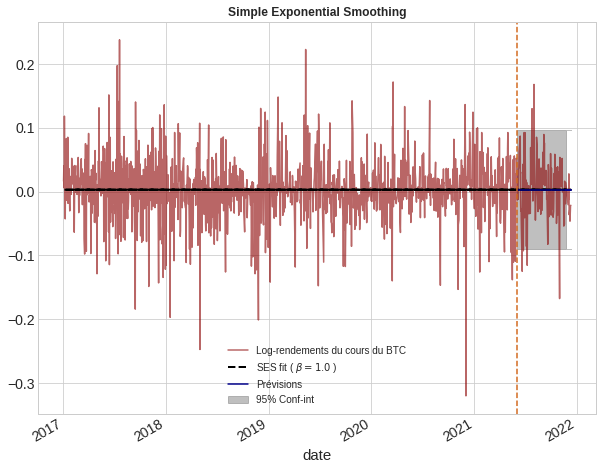

In [57]:
logrets.plot(color='darkred', alpha=0.6)
plt.plot(ses_fit.fittedvalues, color='black', linestyle='dashed', linewidth=2)
plt.plot(lrets_predict.index, ses_forecasts, color='darkblue')
plt.fill_between(lrets_predict.index, ses_ci['down'],ses_ci['up'], color='gray', alpha=0.5)
plt.title('Simple Exponential Smoothing', fontdict={'weight':'bold'})
plt.legend(['Log-rendements du cours du BTC','SES fit ( '+ ses_forecasts.name +' )', 'Prévisions','95% Conf-int'])
plt.axvline(x=lrets_predict.index[0], linestyle='dashed', color='chocolate')

$ \textbf{Commentaire: } $

Le lissage exponentiel simple est surtout adapté à des séries pouvant être ajustées par une constante
au voisinage de t. Ce qui n'est donc pas le cas du Cours du BITCOIN qui flux de façon réguière dans le temps.


 ### Erreur de prédiction

In [59]:
def RMSE(data1, data2):
    n = len(data1)
    print('RMSE : ')
    return np.sqrt(((data2-data1)**2).sum()/n)

In [60]:
RMSE(ses_forecasts, lrets_predict.values)

RMSE : 


0.047411915397901475

### Interprétation de résultats sur le lissage exponnentiel simple : 

On remarque que le modèle n’arrive pas à capter les fluctuations des log-rendements, en plus les
prévisions sont constantes quelque soit l’horizon temporel considéré. l’erreur de prévision empirique
de ce modèle est : RMSE = 0.04741.

## Modèle linéaire ARIMA : 

### Estimation des parametres du Modèle ARIMA

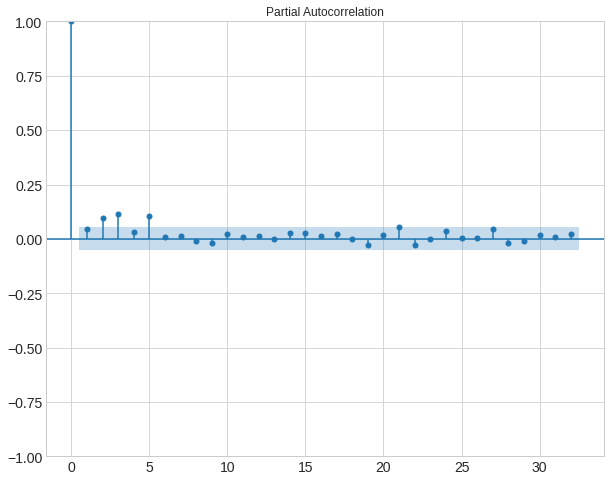

In [648]:
plot_pacf(logrets**2)
plt.show()

$ \textbf{Commentaire:}$ 

On a les autocorrélation partielles non nulle jusqu'à l'ordre 5. Alors on a peut choisier modeliser notre série des log rendements selon le modèle ARIMA(p,0,q) avec p entier dans $[0,5]$ et q entier dans $[0,5]$

In [672]:
for p in range(0,6):
    for q in range(0,6):
        mdl=smt.ARIMA(logrets, order=(p,0,q)).fit()
        res=mdl.resid
        lj=sm.stats.diagnostic.acorr_ljungbox(res, lags=[5], model_df=p+q,return_df=True)
        pv=lj.values[0][1]
        print('model : ARIMA (',p,',0,',q,')', 'AIC : ',np.round(mdl.aic,4),'p-value : ',np.round(pv, 4))

model : ARIMA ( 0 ,0, 0 ) AIC :  -4540.5289 p-value :  0.1062
model : ARIMA ( 0 ,0, 1 ) AIC :  -4539.6675 p-value :  0.1063
model : ARIMA ( 0 ,0, 2 ) AIC :  -4543.0184 p-value :  0.561
model : ARIMA ( 0 ,0, 3 ) AIC :  -4541.021 p-value :  0.3582
model : ARIMA ( 0 ,0, 4 ) AIC :  -4539.8257 p-value :  0.2649
model : ARIMA ( 0 ,0, 5 ) AIC :  -4538.9928 p-value :  nan
model : ARIMA ( 1 ,0, 0 ) AIC :  -4539.818 p-value :  0.1134
model : ARIMA ( 1 ,0, 1 ) AIC :  -4542.9603 p-value :  0.4702
model : ARIMA ( 1 ,0, 2 ) AIC :  -4540.9718 p-value :  0.3505
model : ARIMA ( 1 ,0, 3 ) AIC :  -4540.7379 p-value :  0.3496
model : ARIMA ( 1 ,0, 4 ) AIC :  -4538.4395 p-value :  nan
model : ARIMA ( 1 ,0, 5 ) AIC :  -4536.9824 p-value :  nan
model : ARIMA ( 2 ,0, 0 ) AIC :  -4543.2571 p-value :  0.6113
model : ARIMA ( 2 ,0, 1 ) AIC :  -4541.2559 p-value :  0.4035
model : ARIMA ( 2 ,0, 2 ) AIC :  -4540.1041 p-value :  0.3016
model : ARIMA ( 2 ,0, 3 ) AIC :  -4538.5852 p-value :  nan
model : ARIMA ( 2 ,0, 4

$ \textbf{Interprétation: } $

Le modele ARIMA(2,0,0) nous donne un critère AIC le plus faible et une P-value>5% . Il est le modèle qui correspond le mieux.

### Estimation des résidus du model

In [673]:
import pmdarima as pmd

In [674]:
mean_mdl=pmd.auto_arima(logrets, start_q=0, start_p=0)

In [696]:
residuals = pd.Series(mean_mdl.resid(), index=logrets.index)

In [664]:
stats.kstest(residuals, 'norm')

KstestResult(statistic=0.4402907241730616, pvalue=9.598111041042723e-247)

$ \textbf{Interprétation: } $

On a une p-value>5% alors on ne rejette pas l'hypothèse Ho selon laquelle les résidus suivent une loi normale. 

### Estimation de la Volatilité sous le Modèle ARIMA(2,0,0)

En prenant considérant 
$ M_t$ le prix maximal observé le jour t 
$ L_t$ le prix minimal observé le jour t 
$ O_t$ le prix d'ouverture observé le jour t 

Le Modèle Rogers & Satchell (1991) estime la volatilité par :

$\sigma_t =(\frac{1}{h}\sum_{j=t-h}^{t} \log(\frac{M_j}{O_j}) \log(\frac{M_j}{P_j})+\log(\frac{L_j}{O_j}) \log(\frac{L_j}{P_j}))^{1/2}$

Le Modèle Parkinson (1980) estime la volatilité par :

$\sigma_t =(\frac{1}{4h\log(2)}\sum_{j=t-h}^{t}(\log(\frac{M_j}{L_j}))^2 )^{1/2}$




In [ ]:
class VolatilityEst:
    __Estimators__ = ['Rolling', 'EWMA', 'RogersSatchell', 'Parkinson', 'GarmanKlass']

    def __init__(self, data):
        self.data = data
        return None
    def printNames(self):
        return VolatilityEst.__Estimators__    

    def __getLret(self, close):
        return close.pct_change().apply(lambda x: np.log(1 + x)).dropna()

    def Estimate(self, window = 5, name = 'Rolling'):
        if (name == 'Rolling'):
            est = np.sqrt((self.__getLret(self.data['clot'])**2).rolling(window).mean())

        if(name == 'EWMA'):
            est = np.sqrt((self.__getLret(self.data['clot'])**2).ewm(alpha=1.-0.94).mean())
             

        if(name == 'RogersSatchell'):
            est = np.sqrt( (np.log(self.data['haut']/self.data['bas']) * np.log(self.data['haut']/self.data['clot']) + np.log(self.data['bas']/self.data['ouv']) * np.log(self.data['bas']/self.data['clot'])).rolling(window).mean())

        if(name == 'Parkinson'):
            est = np.sqrt(((0.25/np.log(2))*(np.log(self.data['haut']/self.data['bas']))**2).rolling(window).mean())

        if(name == 'GarmanKlass'):
            c = window/(window-1)
            est = np.sqrt((0.51*c*(np.log(self.data['haut']/self.data['bas']))**2 - 0.39*c*self.__getLret(self.data['clot'])**2).rolling(window).mean())

        return est[:'2021-12-31']

In [23]:
BTC_2=BTC['2021-01-01':].copy()
Close_2=Close['2021-01-01':]
logreturns=Close_2.pct_change().apply(lambda x: np.log(1 + x)).dropna()
vol = VolatilityEst(BTC_2)

/tmp/ipykernel_15581/4280024961.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  BTC_2=BTC['2021-01-01':].copy()
/tmp/ipykernel_15581/4280024961.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Close_2=Close['2021-01-01':]


In [17]:
vol.printNames()

['Rolling', 'EWMA', 'RogersSatchell', 'Parkinson', 'GarmanKlass']

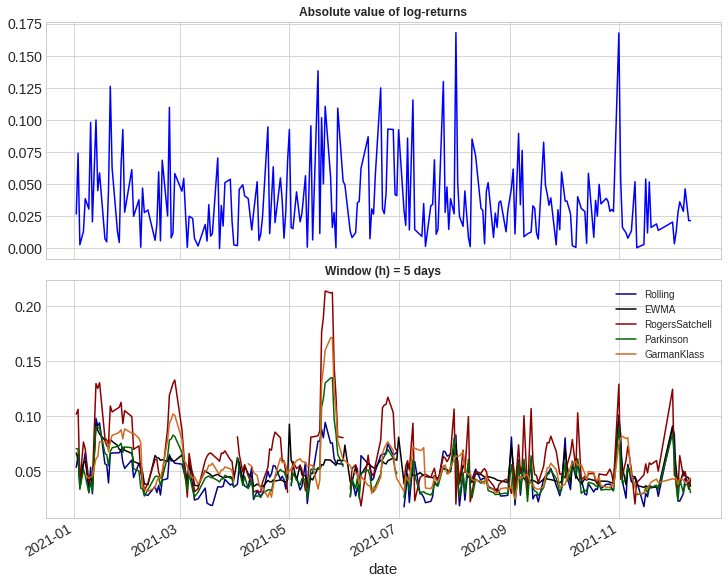

In [18]:
colors = ['darkblue', 'black', 'darkred', 'darkgreen', 'chocolate']
fig, axs = plt.subplots(2,1, constrained_layout=True, sharex=True)
logreturns.apply(lambda x: np.abs(x)).plot(color='blue', ax=axs[0])
axs[0].set_title('Absolute value of log-returns', fontdict={'weight':'bold'})
for name, color in zip(vol.printNames(), colors):
    vol.Estimate(name=name).plot(label=name, color=color, ax=axs[1])
plt.title('Window (h) = 5 days', fontdict={'weight':'bold'})
plt.legend()

$ \textbf{Interprétation: } $ 

Tous les modèles arrivents à capter les hausses et baisses des cours du BITCOIN. Quoique le modèle de Garman prédit de plus grande hausse. Le Modèle de Parkison semble prédire les meileur variation de la volatilité.

## Modèle GARCH

### Test de la Validité du Modèle: 

In [681]:
from statsmodels.stats.diagnostic import het_arch

In [682]:
test_arch=het_arch(residuals, nlags=1)
name=["LM","LM p-value", "F", "F p-value"]
res_arch=pd.Series(test_arch, index=name)
res_arch

LM            2.370084
LM p-value    0.123680
F             2.370714
F p-value     0.123858
dtype: float64

### Formulation du Modèle GARCH(p,0,q)

In [ ]:
!pip install pandas_datareader

     |████████████████████████████████| 109 kB 335 kB/s            
     |████████████████████████████████| 6.9 MB 80 kB/s             


In [683]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [684]:
model = arch_model(logrets, p=1, q=1)

In [685]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -2333.528285622524
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2333.5282856036356
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1


In [686]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   clot   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2333.53
Distribution:                  Normal   AIC:                          -4659.06
Method:            Maximum Likelihood   BIC:                          -4638.09
                                        No. Observations:                 1395
Date:                Thu, Jan 06 2022   Df Residuals:                     1394
Time:                        16:47:57   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.9142e-03  1.112e-03      2.621  8.757e-03 [7.353e-04,5.093e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.2527e-04  1.345e-04      1.676  9.383e-02 [-3.824e-05,4.888e-04]
alpha[1]       0.1000  2.633e-02      3.798  1.457e-04    [4.840e-02,  0.152]
beta[1]        0.8000  7.070e-02     11.315  1.110e-29      [  0.661,  0.939]
=============================================================================

Covariance estimator: robust
"""

### Forcasting avec GARCH(1,0,1)

In [63]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = logrets[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

NameError: name 'arch_model' is not defined

In [688]:
rolling_predictions = pd.Series(rolling_predictions, index=logrets.index[-365:])

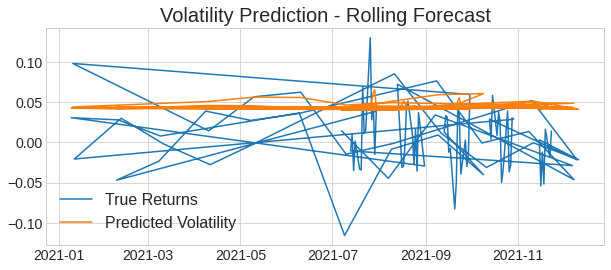

In [689]:
plt.figure(figsize=(10,4))
true, = plt.plot(logrets[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

$ \textbf{Interprétation: } $ 

Abort du code ML de prévision par entrainement de la Volatilité